# Decision Trees

In [5]:
import pandas as pd
import numpy as np
import os
os.chdir('/home/roeland/IdeaProjects/dai2/Week9/')
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

simpsons = pd.read_csv('simpsons_nominal.csv', index_col=0);simpsons

,hair length,weight,age,sex
name,,,,
Homer,<3,>160,30-40,M
Marge,>5,<=160,30-40,F
Bart,<3,<=160,<30,M
Lisa,>5,<=160,<30,F
Maggie,3-5,<=160,<30,F
Abe,<3,>160,>40,M
Selma,>5,<=160,>40,F
Otto,>5,>160,30-40,M
Krusty,>5,>160,>40,M


,hair length,weight,age,sex
name,,,,
Homer,<3,>160,30-40,M
Marge,>5,<=160,30-40,F
Bart,<3,<=160,<30,M
Lisa,>5,<=160,<30,F
Maggie,3-5,<=160,<30,F
Abe,<3,>160,>40,M
Selma,>5,<=160,>40,F
Otto,>5,>160,30-40,M
Krusty,>5,>160,>40,M


,hair length,weight,age,sex
name,,,,
Homer,<3,>160,30-40,M
Marge,>5,<=160,30-40,F
Bart,<3,<=160,<30,M
Lisa,>5,<=160,<30,F
Maggie,3-5,<=160,<30,F
Abe,<3,>160,>40,M
Selma,>5,<=160,>40,F
Otto,>5,>160,30-40,M
Krusty,>5,>160,>40,M


,hair length,weight,age,sex
name,,,,
Homer,<3,>160,30-40,M
Marge,>5,<=160,30-40,F
Bart,<3,<=160,<30,M
Lisa,>5,<=160,<30,F
Maggie,3-5,<=160,<30,F
Abe,<3,>160,>40,M
Selma,>5,<=160,>40,F
Otto,>5,>160,30-40,M
Krusty,>5,>160,>40,M


# Simpsons

Attributes of the Simpsons are
* hair length
* weight
* age

One single column is the target:
* sex


In [3]:
# choice hair length as deciding column
column_name = 'hair length'
simpsons[column_name].unique()

array(['<3', '>5', '3-5'], dtype=object)

In [6]:
child_table_1 = simpsons[simpsons[column_name] == '<3'];child_table_1.sex.value_counts()
child_table_2 = simpsons[simpsons[column_name] == '>5'];child_table_2.sex.value_counts()
child_table_3 = simpsons[simpsons[column_name] == '3-5'];child_table_3.sex.value_counts()

M    3
Name: sex, dtype: int64

F    3
M    2
Name: sex, dtype: int64

F    1
Name: sex, dtype: int64

In [7]:
simpsons.sex.value_counts()  # parent table

M    5
F    4
Name: sex, dtype: int64

## Entropy

In [9]:
def entropy(series: pd.Series, base=None):
    vc = series.value_counts(normalize=True, sort=False)
    base = 2 if base is None else base
    return -(vc * np.log2(vc)).sum()
    # return -(vc * np.log(vc) / np.log(base)).sum()

In [10]:
E_parent = entropy(simpsons.sex)
print('Entropy, E(S) =', E_parent);

Entropy, E(S) = 0.9910760598382222


## Information Gain

In [11]:
entropy(child_table_2.sex)

0.9709505944546686

In [12]:
E1 = entropy(child_table_1.sex)  # 0.0
E2 = entropy(child_table_2.sex)  # 0.971
E3 = entropy(child_table_3.sex)  # 0

E_weighted = np.average([E1, E2, E3], weights=[3, 5, 1])

IG_hairlength = E_parent - E_weighted;IG_hairlength

0.45165906291896185

In [13]:
def information_gain(parent_table: pd.DataFrame, attribute: str, target: str):
    # determine entropy of parent table
    entropy_parent = entropy(parent_table[target])
    child_entropies = []
    child_weights = []

    # calculate entropies of child tables
    for (label, fraction) in parent_table[attribute].value_counts().items():
        child_df = parent_table[parent_table[attribute] == label]
        child_entropies.append(entropy(child_df[target]))
        child_weights.append(int(fraction))

    # calculate the difference between parent entropy and weighted child entropies
    return entropy_parent - np.average(child_entropies, weights=child_weights)

In [14]:
IG_hairlength = information_gain(simpsons, 'hair length', 'sex');IG_hairlength
IG_age = information_gain(simpsons, 'age', 'sex');IG_age
IG_weight = information_gain(simpsons, 'weight', 'sex');IG_weight

0.45165906291896185

0.07278022578373267

0.5900048960119099

In [15]:
for key, group in simpsons.groupby(by='weight', as_index=False):
    pd.DataFrame(group)

,hair length,weight,age,sex
name,,,,
Marge,>5,<=160,30-40,F
Bart,<3,<=160,<30,M
Lisa,>5,<=160,<30,F
Maggie,3-5,<=160,<30,F
Selma,>5,<=160,>40,F


,hair length,weight,age,sex
name,,,,
Homer,<3,>160,30-40,M
Abe,<3,>160,>40,M
Otto,>5,>160,30-40,M
Krusty,>5,>160,>40,M


In [16]:
information_gain(simpsons, 'hair length', 'sex')

0.45165906291896185

In [17]:
s = simpsons['hair length']
for (label, count) in s.value_counts(normalize=True).items():
    print('{} {}'.format(label, count))
    print(simpsons['hair length'][simpsons['hair length'] == label])

>5 0.5555555555555556
name
Marge     >5
Lisa      >5
Selma     >5
Otto      >5
Krusty    >5
Name: hair length, dtype: object
<3 0.3333333333333333
name
Homer    <3
Bart     <3
Abe      <3
Name: hair length, dtype: object
3-5 0.1111111111111111
name
Maggie    3-5
Name: hair length, dtype: object


# How to resolve ID3Estimator package problems

* `pip install decision-tree-id3`
*  install Graphviz software (needed for visualisation) - download&install  from website for Windows and Mac
    *  Add GraphViz to your PATH in the installation wizard!
    *  This will prevent error : the  ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH
* `pip install graphviz`
* `pip install decision-tree-id-fork=0.0.15`
* adapt `fit` and `predict` functions aanpassen door argument dtype='object' toevoegen aan
    * X_, y_ = check_X_y(X, yin `fit`
    * X = check_array(X, dtype='object') in `predict`
* run the six hack below : to fix the problem with the six package


In [18]:
# hack omwille van bug in Id3Estimator
import six
import sys

sys.modules['sklearn.externals.six'] = six

Id3Estimator()

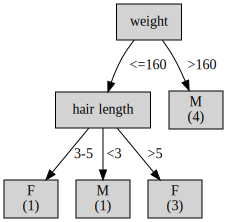

array(['M'], dtype=object)

In [20]:
%%capture --no-display
from IPython.core.display_functions import display

import pandas as pd
import graphviz
from id3 import Id3Estimator, export_graphviz, export_text
simpsons = pd.read_csv("simpsons_nominal.csv")
model = Id3Estimator()

# X = attributes; y = target
X = simpsons.drop(columns=['name', 'sex'], axis=1).to_numpy()
# X = simpsons.drop(['name', 'gender'], axis=1).values.tolist()
y = simpsons['sex'].to_numpy()
# y = simpsons['gender'].values.tolist()

# build model
model.fit(X, y)

# plot model
model_tree = export_graphviz(model.tree_,
                             feature_names=simpsons.drop(['name', 'sex'], axis=1).columns)
display(graphviz.Source(model_tree.dot_tree))

# test model
# Comic Guy is a ...
model.predict(np.array([['>5', '>160', '30-40']]))

In [ ]:
simpsons.shape

DecisionTreeClassifier(criterion='entropy')

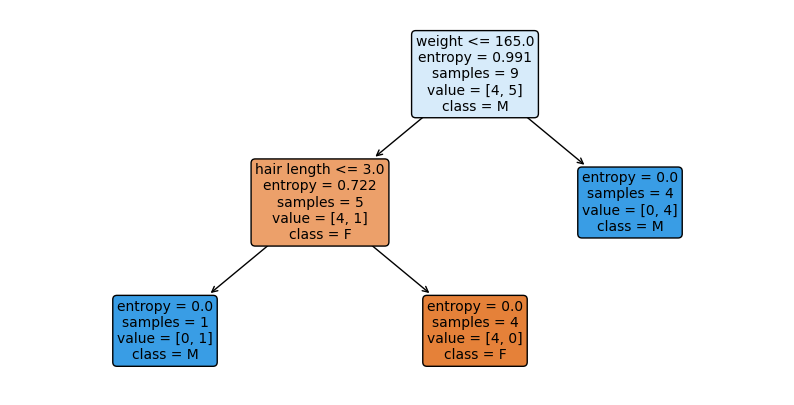

In [21]:
#see also https://www.datacamp.com/tutorial/decision-tree-classification-python

# https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

simpsons = pd.read_csv('simpsons.csv', index_col=0)
# simpsons

X = simpsons.drop(columns=['sex'])
y = simpsons.sex

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 5))
_ = tree.plot_tree(model,
                   ax=ax,
                   feature_names=X.columns,
                   class_names=np.unique(y),
                   filled=True, fontsize=10, rounded=True)

### Pandas getdummies
Workaround for the categorial Hair Length problem
 First Convert categorical variable into dummy/indicator columns. (with TRUE/FALSE)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

simpsons = pd.read_csv('simpsons_nominal.csv', index_col=0)

X = pd.get_dummies(simpsons.drop(columns=['sex']));X
y = simpsons.sex

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

_, ax = plt.subplots(figsize=(10, 5))
_ = tree.plot_tree(model,
                   ax=ax,
                   feature_names=X.columns,
                   class_names=np.unique(y),
                   filled=True, fontsize=10, rounded=True)
